In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Labeled_Dataset_with_Keywords.csv")

In [2]:
df.head()

,Source,Link,Headline,Description,Timestamp,Date,Topic,Author,Region,Article_Content,Sentiment_Bias,Keywords
0,Al Jazeera,https://www.aljazeera.com/tag/israel-palestine...,Israel-Palestine conflict | Today's latest fro...,How Israel destroyed Gaza · 'The birds are wit...,3 Oct 2024,2024-10-14,Israel War,AlJazeera,Middle East,‘Self-defence’ has vastly different meanings f...,Negative,"['genocide', 'killing', 'canadians', 'killed',..."
1,Al Jazeera,https://www.aljazeera.com/tag/gaza/,Gaza | Today's latest from Al Jazeera,... Israeli. Nicaragua breaks diplomatic ties ...,12 Oct 2024,2024-10-14,Israel War,AlJazeera,Middle East,‘Self-defence’ has vastly different meanings f...,Negative,"['killed', 'siege', 'bomb', 'attack', 'injured..."
2,Al Jazeera,https://www.aljazeera.com/news/2023/9/28/turki...,Turkish neutrality: How Erdogan manages ties w...,"Sep 28, 2023 ... But Erdogan's stance does hel...",Last update 28 Sep 2023,2024-10-14,Ukraine War,AlJazeera,Ukraine,"‘The West is reliable, Russia is equally relia...",Neutral,"['putin', '1850s', 'russian', 'pbs', 'russia',..."
3,Al Jazeera,https://www.aljazeera.com/features/2016/11/8/u...,US elections in Nigeria: 'The best reality TV ...,"Nov 8, 2016 ... Efeoghene Ori-Jesu, 34, is wat...",Last update 8 Nov 2016,2024-10-15,US Presidential Elections,AlJazeera,USA,“I’m excited at the possibility of a first fem...,Positive,"['president', 'trump', 'americans', 'clinton',..."
4,Al Jazeera,https://www.aljazeera.com/news/liveblog/2024/9...,Israel's war on Gaza updates: New blasts in Le...,"Sep 18, 2024 ... A day after simultaneous blas...",Last update 19 Sep 2024,2024-10-14,Israel War,AlJazeera,Middle East,A day after simultaneous blasts across Lebanon...,Negative,"['killed', 'explosions', 'wounded', 'blasts', ..."


## Sentiment Distribution of Dataset

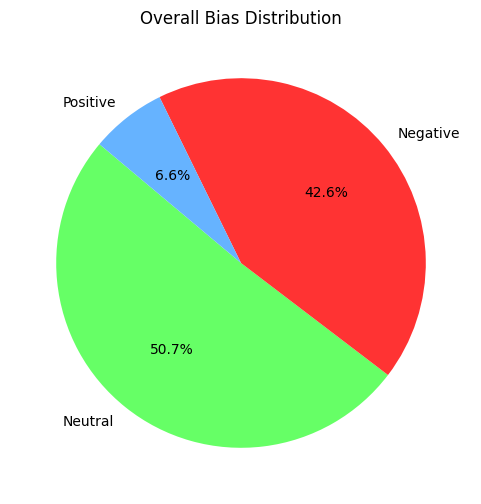

In [20]:
colors = ['#66FF66', '#FF3333', '#66B3FF']
bias_counts = df['Sentiment_Bias'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(bias_counts, labels=bias_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Overall Bias Distribution')
plt.show()


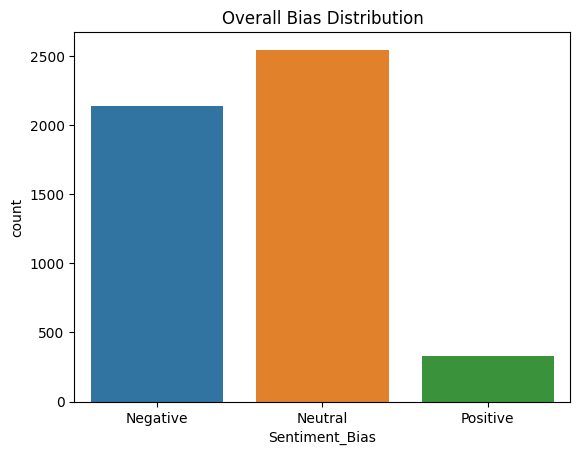

In [63]:

sns.countplot(x='Sentiment_Bias', hue='Sentiment_Bias', data=df)
plt.title('Overall Bias Distribution')
plt.show()


## Bias Distribution by Source

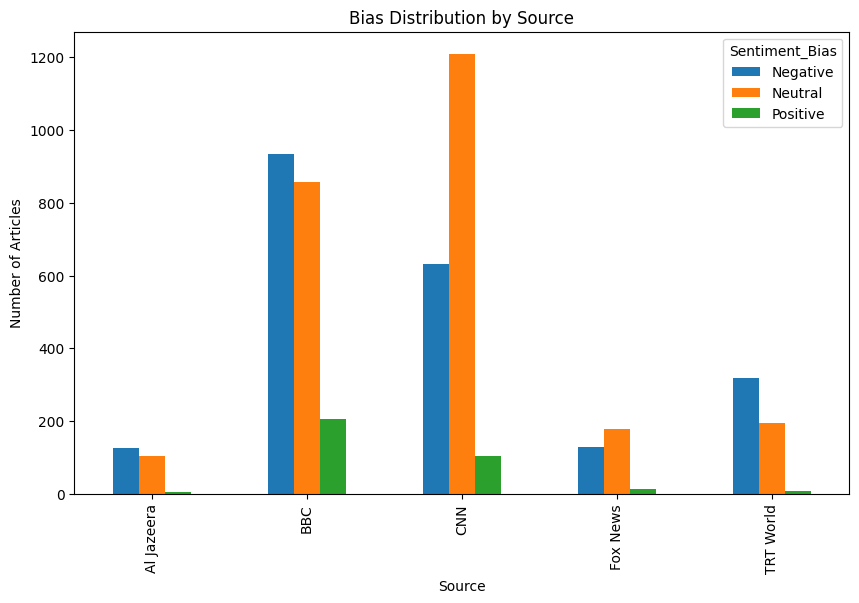

In [64]:
bias_source = df.groupby(['Source', 'Sentiment_Bias']).size().unstack(fill_value=0)

bias_source.plot(kind='bar', figsize=(10, 6))

plt.title('Bias Distribution by Source')
plt.ylabel('Number of Articles')
plt.xlabel('Source')
plt.show()


## Regional Bias Distribution

In [ ]:
import plotly.express as px

fig = px.choropleth(df, 
                    locations='Region', 
                    locationmode='country names', 
                    color='Sentiment_Bias', 
                    title='Bias Distribution by Source')
fig.show()


## Multivariate Analysis: Topics vs Sources by Bias

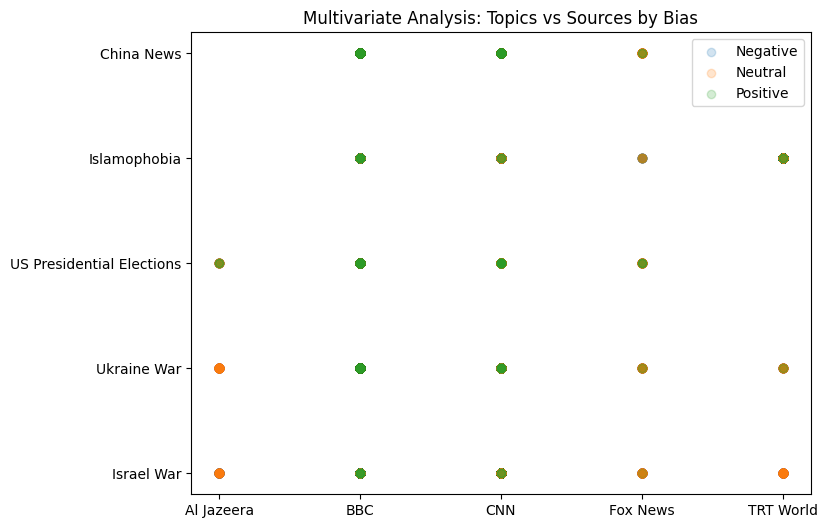

In [77]:
plt.figure(figsize=(8, 6))
for bias, group in df.groupby('Sentiment_Bias'):
    plt.scatter(group['Source'], group['Topic'], label=bias, alpha=0.2)
plt.title('Multivariate Analysis: Topics vs Sources by Bias')
plt.legend()
plt.show()


In [80]:
fig = px.scatter(df, x='Topic', y='Source', color='Sentiment_Bias', title='Topics vs Sources by Bias', hover_data=['Region'])
fig.show()


### Heatmap to visualize the frequency of articles from each source on each Topic 

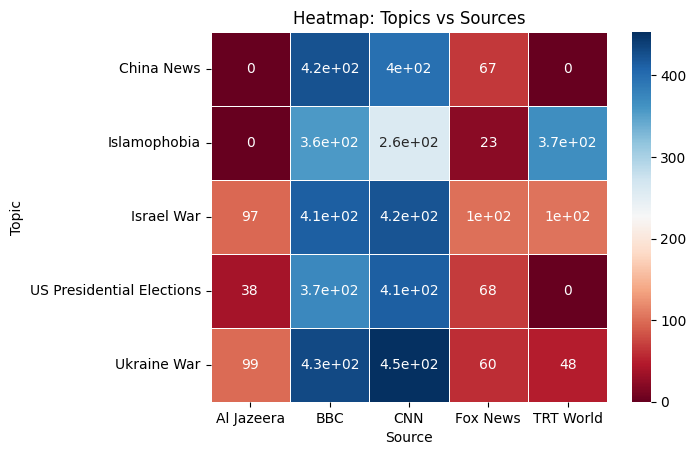

In [22]:
heatmap_data = df.pivot_table(index='Topic', columns='Source', values='Sentiment_Bias', aggfunc='count', fill_value=0)

sns.heatmap(heatmap_data, annot=True, cmap='RdBu', linewidths=0.5)
plt.title('Heatmap: Topics vs Sources')
plt.show()


### Bias Distribution by Source for each Topic

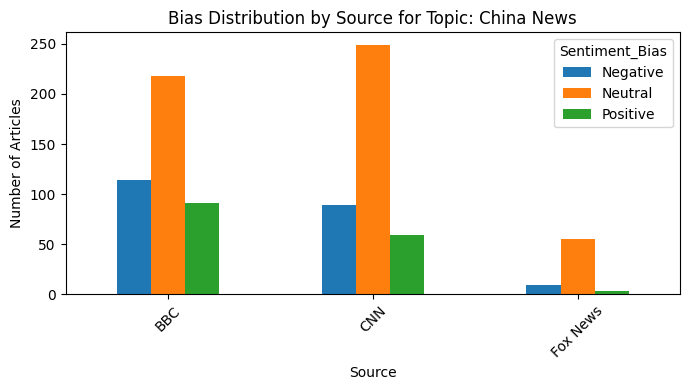

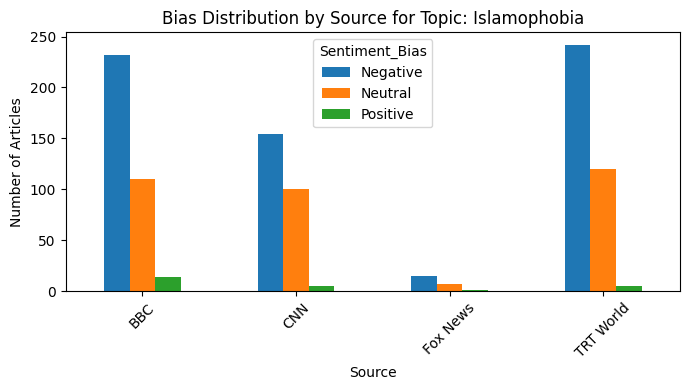

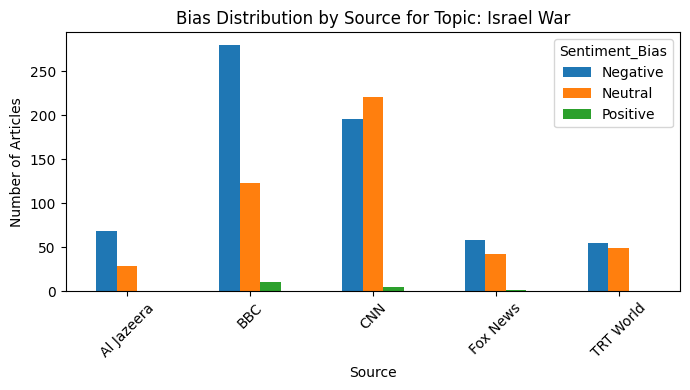

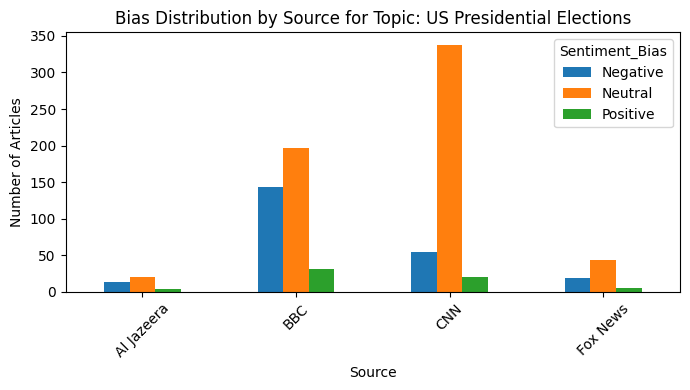

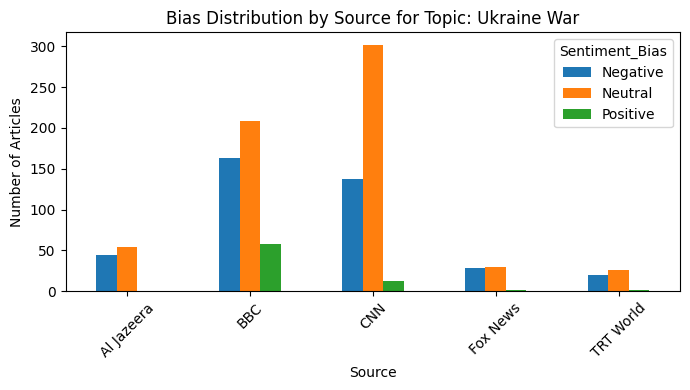

In [28]:
bias_source = df.groupby(['Topic', 'Source', 'Sentiment_Bias']).size().unstack(fill_value=0)

topics = bias_source.index.levels[0]  
for topic in topics:
    topic_data = bias_source.loc[topic]  
    
    topic_data.plot(kind='bar', figsize=(7, 4))
    
    plt.title(f'Bias Distribution by Source for Topic: {topic}')
    plt.ylabel('Number of Articles')
    plt.xlabel('Source')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### WordCloud of the keywords from the articles that lead to the classification of Bias Sentiment

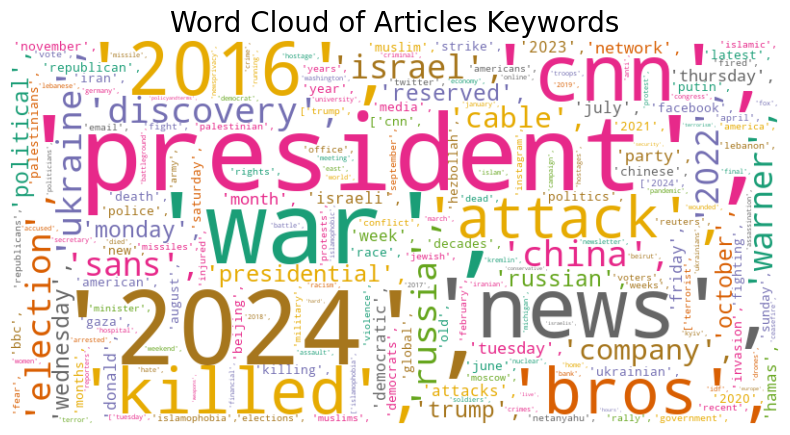

In [19]:
from wordcloud import WordCloud
from collections import Counter

text = ' '.join(df['Keywords'])

words = text.split()
word_counts = Counter(words)

wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      colormap='Dark2',  
                      max_words=200,       
                      relative_scaling=0.5 
                     ).generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Articles Keywords', fontsize=20)
plt.show()